In [97]:
import numpy as np
import pandas as pd
import plotly.express as px
import gp_lib

In [98]:
import importlib
def reload():
    global gp_lib

    gp_lib = importlib.reload(gp_lib)

In [99]:
data = pd.read_csv('extracted_data.csv')
# data.rename(columns={'Reading Date and Time (ISO)':'Time (hours)'}, inplace=True)
# data['Time (hours)']/=3600
# data.drop_duplicates(subset='Time (hours)',inplace=True)

In [100]:

# data = pd.read_csv('extracted_data.csv')
# data.rename(columns={'Reading Date and Time (ISO)':'Time (hours)'}, inplace=True)
# data['Time (hours)']/=3600
# data.drop_duplicates(subset='Time (hours)',inplace=True)

mask = pd.notna(data['Tide height (m)'])

# data.loc[~mask, 'Tide height (m)'] = yt 

test = data[~mask].to_numpy()
train = data[mask].to_numpy()

X,y = train[:,0], train[:,1]
Xt = test[:,0]

data['Inputed'] = False
data.loc[~mask,'Inputed'] = True

src_df = pd.read_csv('sotonmet.txt')
n_mask = pd.Series([mask[k] if k in mask.index else True for k in range(len(src_df))])
truth = pd.read_csv('sotonmet.txt').loc[~n_mask, 'True tide height (m)'].to_numpy()






In [101]:
kern = gp_lib.RBF(var=0.1, scale=0.1)

yt, cov_yt, logp = gp_lib.gaussian_process(X,y,Xt,kern.k)
data.loc[~mask, 'Tide height (m)'] = yt 


print(f'{logp=}')
fig = px.scatter(data, x='Time (hours)', y='Tide height (m)', color='Inputed', template='plotly_white')
fig.update_layout(title='RBF kernel, with variance=0.1std, length scale=0.1std', ).show()

fig.write_image('rbf.png')

TypeError: gaussian_process() missing 2 required positional arguments: 'kernel_func' and 'nvar'

In [13]:
kern1 = gp_lib.Periodic(scale=0.1, length=0.1, period=0.354)
kern2 = gp_lib.RBF(var=0.1, scale=0.04)
def mixed_k(a,b):
    return kern1.k(a,b) + kern2.k(a,b)


yt, cov_yt, logp = gp_lib.gaussian_process(X,y,Xt,mixed_k)
data.loc[~mask, 'Tide height (m)'] = yt 

print(f'{logp=}')


fig = px.scatter(data, x='Time (hours)', y='Tide height (m)', color='Inputed', template='plotly_white')
fig.update_layout(title='Mixed kernel, with variance=0.1std, length scale=0.1std, period=0.3std', ).show()

fig.write_image('periodic.png')

logp=inf


/Users/kaye/Library/CloudStorage/OneDrive-Nexus365/AIMS/Inference/gp_lib.py:122: RuntimeWarning:

divide by zero encountered in log



In [4]:
plt_x, plt_y = gp_lib.get_scaled_data(X, y)

In [5]:
# plotting the standardized data
px.line(x=plt_x,y=plt_y)

In [72]:

fig = px.scatter(data, x='Time (hours)', y='Tide height (m)', color='Inputed', template='plotly_white')
fig.update_layout(title='Mixed kernel, with variance=0.1std, length scale=0.1std, period=0.3std', ).show()

print(f'{logp=}')

logp=-156.76706160380851


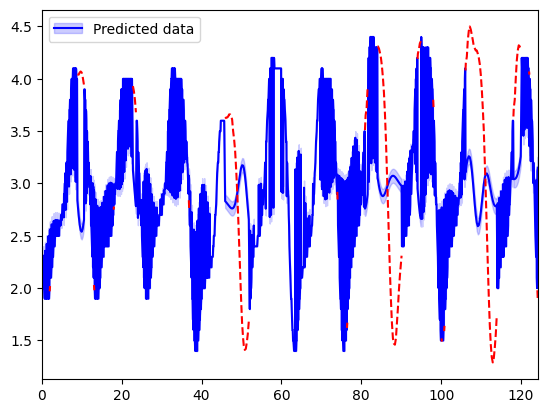

In [87]:


kernel_opt = gp_lib.PeriodicRbf(*[0.1,0.04, 0.1, 0.354])


kernel_opt = gp_lib.PeriodicRbf(*[0.5367384604035261, 1.0, 1.0, 0.4065696556749025])
# kernel_opt = gp_lib.PeriodicRbf(*[0.5051306832635492, 1.0, 1.0, 0.4065696556749025])

# kernel_opt = gp_lib.PeriodicRbf(*[0.1353352832366127, 0.01831563888873418, 0.01831563888873418, 0.3011942149241442])
# gp_lib.gaussian_process()
yt, cov_yt, logp = gp_lib.gaussian_process(X,y,Xt,truth,kernel_opt.k, nvar=1e-1)
data.loc[~mask, 'Tide height (m)'] = yt 
data['Tide error (m)'] = 0.
data.loc[~mask, 'Tide error (m)'] = 2*np.sqrt(cov_yt)
data['Tide actual (m)'] = np.nan
data.loc[~mask, 'Tide actual (m)'] = truth

gp_lib.plot(data)





RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.84843D+03    |proj g|=  2.69741D+00

At iterate    1    f= -2.85861D+04    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      2      4     0     4   0.000D+00  -2.859D+04
  F =  -28586.104876317379     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


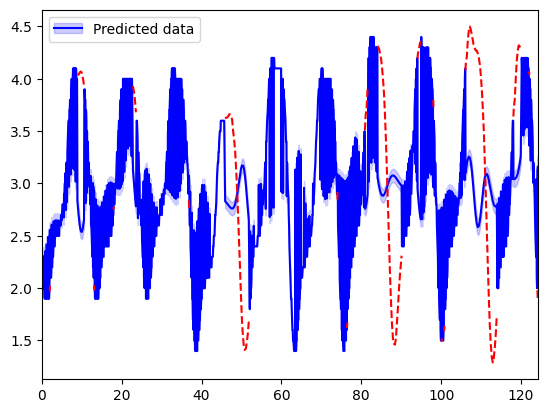

In [90]:
kern = gp_lib.PeriodicRbf(0, 0, 0, 0)

nvar = 9e-2

kern_init = [-2.30258509, -3.21887582, -2.30258509, -1.03845837]
bounds = [(-4, 2), (-5, -2), (-5, -2), (-1.2, -0.9)]

testp = gp_lib.opti mise_kernel(X, y, kern, nvar, kern_init, bounds)

yt, cov_yt, logp = gp_lib.gaussian_process(X,y,Xt,truth,kernel_opt.k, nvar=nvar)
data.loc[~mask, 'Tide height (m)'] = yt 
data['Tide error (m)'] = 0.
data.loc[~mask, 'Tide error (m)'] = 2*np.sqrt(cov_yt)
data['Tide actual (m)'] = np.nan
data.loc[~mask, 'Tide actual (m)'] = truth

gp_lib.plot(data)


In [102]:
reload()
kern = gp_lib.RbfOpt(0.,0.)

nvar = 9e-2

kern_init = [-2.30258509, -3.21887582]
bounds = [(-4, 2), (-5, -2)]

testp = gp_lib.optimise_kernel(X, y, kern, nvar, kern_init, bounds)

yt, cov_yt, logp = gp_lib.gaussian_process(X,y,Xt,truth,kernel_opt.k,nvar)
data.loc[~mask, 'Tide height (m)'] = yt 
data['Tide error (m)'] = 0.
data.loc[~mask, 'Tide error (m)'] = 2*np.sqrt(cov_yt)
data['Tide actual (m)'] = np.nan
data.loc[~mask, 'Tide actual (m)'] = truth

gp_lib.plot(data)


TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'